In [2]:

#cpu - gpu configuration
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

#variables
num_classes = 7 
batch_size = 256
epochs = 5

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


with open("C:/Users/mansi/Desktop/dataset/fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

Using TensorFlow backend.


number of instances:  35888
instance length:  2304


In [3]:

x_train, y_train, x_test, y_test = [], [], [], []
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")

In [4]:

#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [5]:
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))


In [6]:
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy'] )

#------------------------------

fit = True

if fit == True:
    
    model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) 
else:
    model.load_weights('C:/Users/mansi/Desktop/dataset/facial_expression_model_weights.h5') 
#------------------------------

Epoch 1/5
256/256 [==============================] - 332s 1s/step - loss: 1.7940 - acc: 0.2557
Epoch 2/5
256/256 [==============================] - 329s 1s/step - loss: 1.5703 - acc: 0.3811
Epoch 3/5
256/256 [==============================] - 320s 1s/step - loss: 1.3835 - acc: 0.4689
Epoch 4/5
256/256 [==============================] - 324s 1s/step - loss: 1.2867 - acc: 0.5077
Epoch 5/5
256/256 [==============================] - 23766s 93s/step - loss: 1.2007 - acc: 0.5417


In [7]:
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
#------------------------------

In [8]:
monitor_testset_results = False

if monitor_testset_results == True:
    
    predictions = model.predict(x_test)

    index = 0
    for i in predictions:
        if index < 30 and index >= 20:

            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);

            plt.gray()
            plt.imshow(testing_img)
            plt.show()

            print(i)

            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1


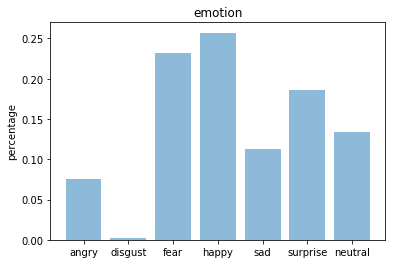

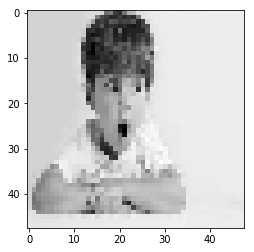

In [20]:
#make prediction for custom image out of test set

img = image.load_img("C:/Users/mansi/Desktop/emotion/images/surprise/22.JPG", color_mode="grayscale" , target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()
train_score=model.evaluate(x_train, y_train, verbose=0)
print('train accuracy',100*train_score[1])
test_score=model.evaluate(x_test, y_test, verbose=0)
print('test accuracy',100*test_score[1])
